## À propos de l'ensemble de données
L'extraction a été effectuée par Barry Becker à partir de la base de données du recensement de 1994.

La tâche de prédiction consiste à déterminer si une personne gagne plus de 50 000 par an.

#### Les colonnes sont :
âge : continu.  

classe de travail : Privé, Auto-emploi-pas-inc, Auto-emploi-inc, Fédéral-gouv, Local-gouv, État-gouv, Sans salaire, Jamais travaillé.

fnlwgt (final weight  "poids final"). En d'autres termes, c'est le nombre de personnes que le recensement estime l'entrée représente  "La variable fnlwgt est le nombre d'unités dans la population cible que l'unité répondante représente."

Scolarité : Licence, Some-collège, 11ème, HS-grad, Prof-école, Assoc-acdm, Assoc-voc, 9ème, 7ème-8ème, 12ème, Master, 1ère-4ème, 10ème, Doctorat, 5ème-6ème, Préscolaire.

education-num : continu.

état civil : Marié-civ-conjoint, Divorcé, Célibataire, Séparé, Veuf, Marié-conjoint-absent, Marié-AF-conjoint.

occupation : Support technique, Artisanat-réparation, Autre-service, Ventes, Cadre-cadre, Prof-spécialité, Manutentionnaires-nettoyeurs, Machine-op-inspct, Adm-clerical, Agriculture-pêche, Transport-déménagement, Priv-house- serv, Protecteur-serv, Armed-Forces.

lien de parenté : Épouse, Propre enfant, Époux, Hors famille, Autre parent, Célibataire.

race : Blanc, Asiatique-Pac-Insulaire, Amer-Indien-Esquimau, Autre, Noir.

sexe : Féminin, Masculin.

plus-value : continue.

moins-value : continue.

heures par semaine : continu.

pays d'origine : États-Unis, Cambodge, Angleterre, Porto-Rico, Canada, Allemagne, Outlying-US (Guam-USVI-etc), Inde, Japon, Grèce, Sud, Chine, Cuba, Iran, Honduras, Philippines, Italie , Pologne, Jamaïque, Vietnam, Mexique, Portugal, Irlande, France, République-Dominicaine, Laos, Equateur, Taïwan, Haïti, Colombie, Hongrie, Guatemala, Nicaragua, Ecosse, Thaïlande, Yougoslavie, El-Salvador, Trinadad&Tobago, Pérou, Hong , Hollande-Pays-Bas.

salaire : <=50K ou >50K

Source : https://archive.ics.uci.edu/ml/datasets/Census+Income

Miniature : https://www.deskera.com/blog/net-salary/

#  Classification des prévisions salariales
### Classification sur le salaire, qu'il soit inférieur à 50 000 ou supérieur à 50 000

## Importation des modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, mean_squared_error

## Chargement du dataset:

In [3]:
data = pd.read_csv("C:/Users/Abdoulaye MAIGA/OneDrive/Bureau/EXO_EXEMPLE/salary.csv")

## Exploration des données:

In [4]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


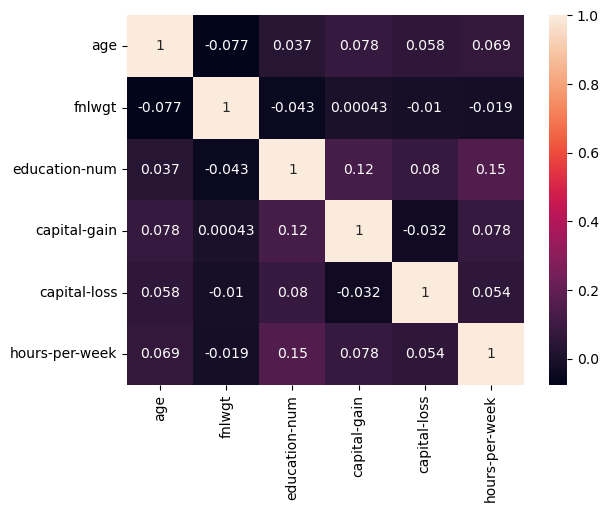

In [5]:
sns.heatmap(data.corr(), annot = True )
plt.show()

In [6]:
def f(x):    
    l = 0
    for e in data[x] :
        #print(e)
        if e == ' ?' :
            l+=1
    return l

In [7]:
for i in data.columns :
    print("Column : ",i)
    print("\n")
    print(f(i))

Column :  age


0
Column :  workclass


1836
Column :  fnlwgt


0
Column :  education


0
Column :  education-num


0
Column :  marital-status


0
Column :  occupation


1843
Column :  relationship


0
Column :  race


0
Column :  sex


0
Column :  capital-gain


0
Column :  capital-loss


0
Column :  hours-per-week


0
Column :  native-country


583
Column :  salary


0


In [8]:
for i in data.columns:
    print("Column : ",i)
    print("\n")
    print(data[i].value_counts())
    print("\n")

Column :  age


36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64


Column :  workclass


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


Column :  fnlwgt


164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64


Column :  education


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th    

## Data Preprocessing (Prétraitement des données)

In [9]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [10]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [11]:
data["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
data["marital-status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

## Encodage One Hot

In [13]:
ohe =  OneHotEncoder()
print(ohe)

OneHotEncoder()


In [14]:
ohe.fit_transform(data[["workclass"]]).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
f_array = ohe.fit_transform(data[["workclass"]]).toarray()
f_array

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
ohe.categories_

[array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
       dtype=object)]

In [20]:
f_labels = ohe.categories_
f_label = list(f_labels)
f_label

[array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
       dtype=object)]

In [21]:
f = pd.DataFrame(f_array,columns = f_labels)
f.head()

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis ( L'analyse exploratoire des données)

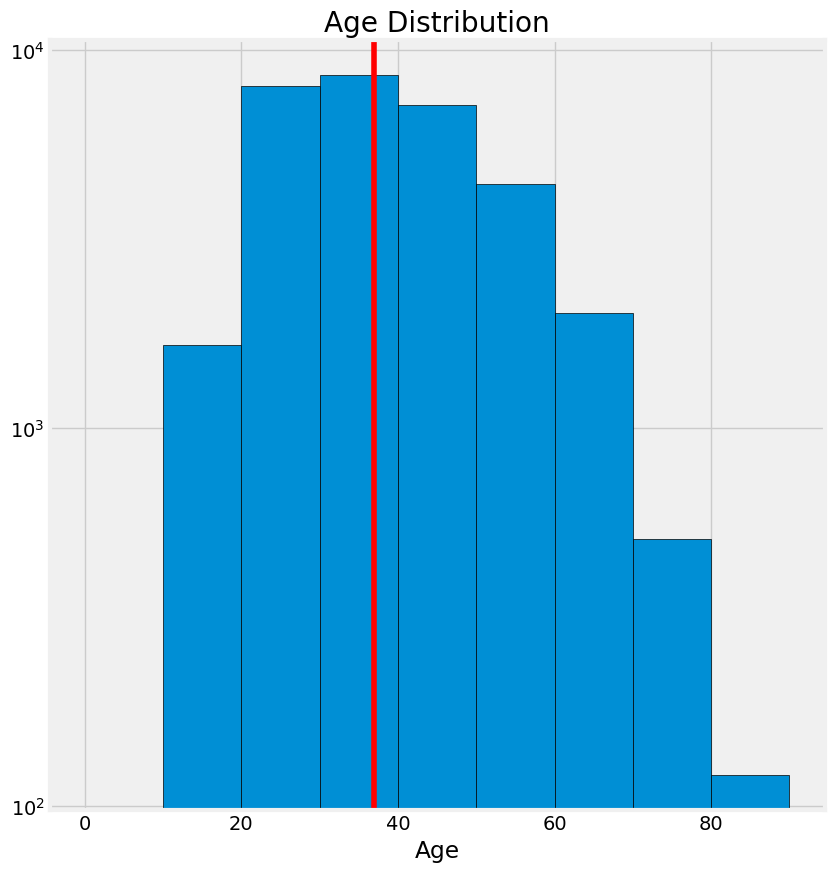

In [22]:
plt.figure(figsize=(10,10))
plt.style.use("fivethirtyeight")
bins = range(0,100, 10)
plt.hist(data.age, bins=bins, edgecolor = "black", log = True)
plt.axvline(data.age.median(), color = "red")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

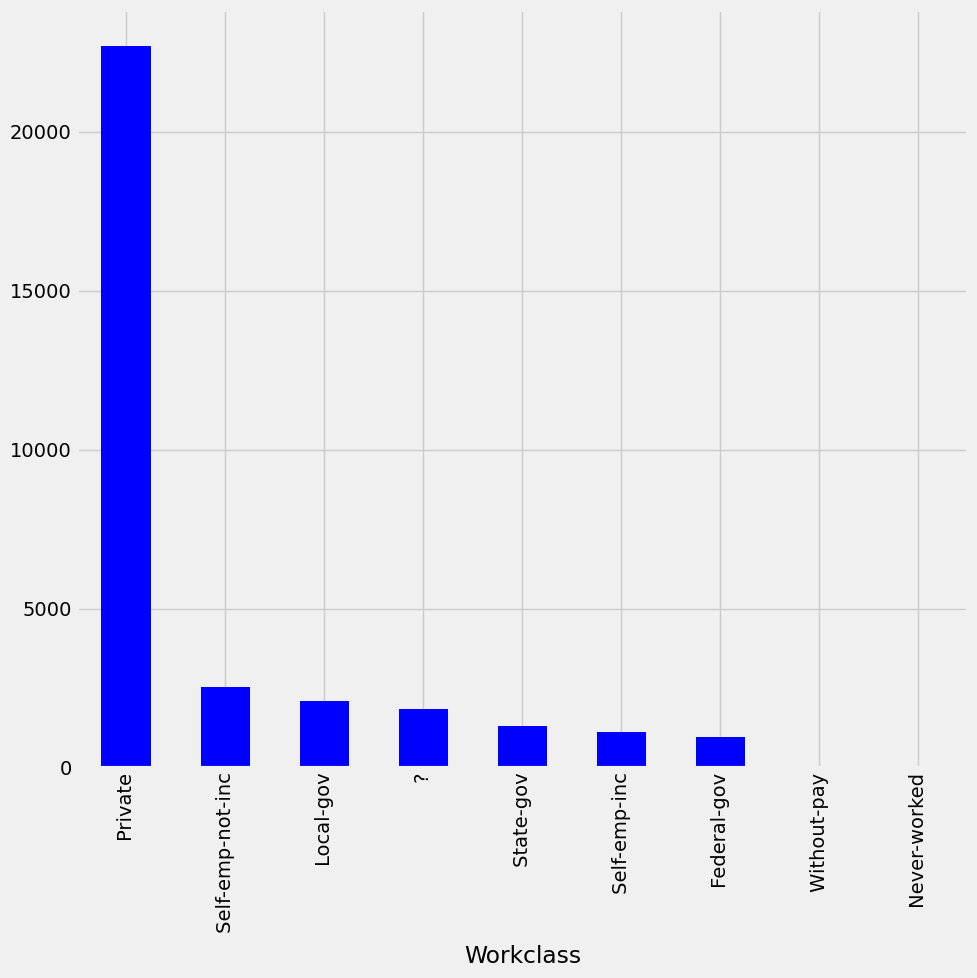

In [23]:
plt.figure(figsize=(10,10))
data.workclass.value_counts().plot(kind="bar", color="blue")
plt.xlabel("Workclass")
plt.tight_layout()
plt.show()

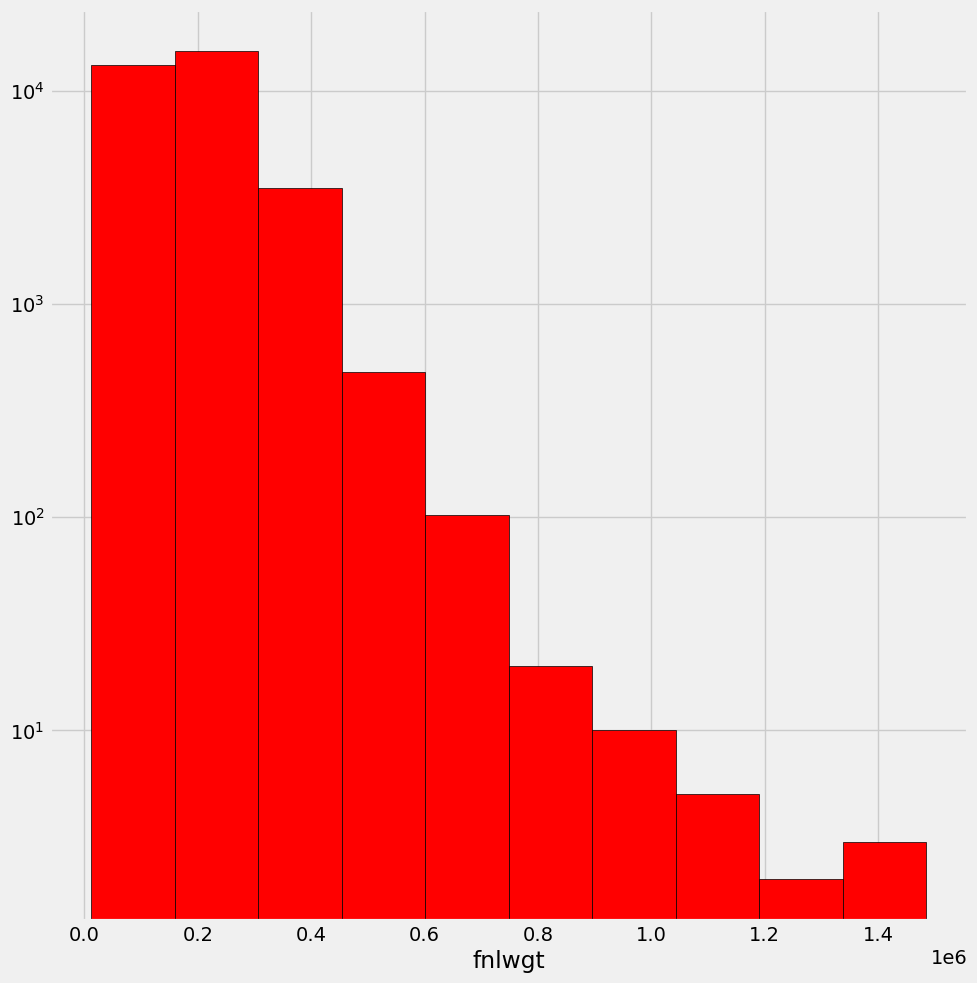

In [24]:
plt.figure(figsize=(10,10))
plt.hist(data.fnlwgt, edgecolor="black", color="red", log=True)
plt.tight_layout()
plt.xlabel("fnlwgt")
plt.show()

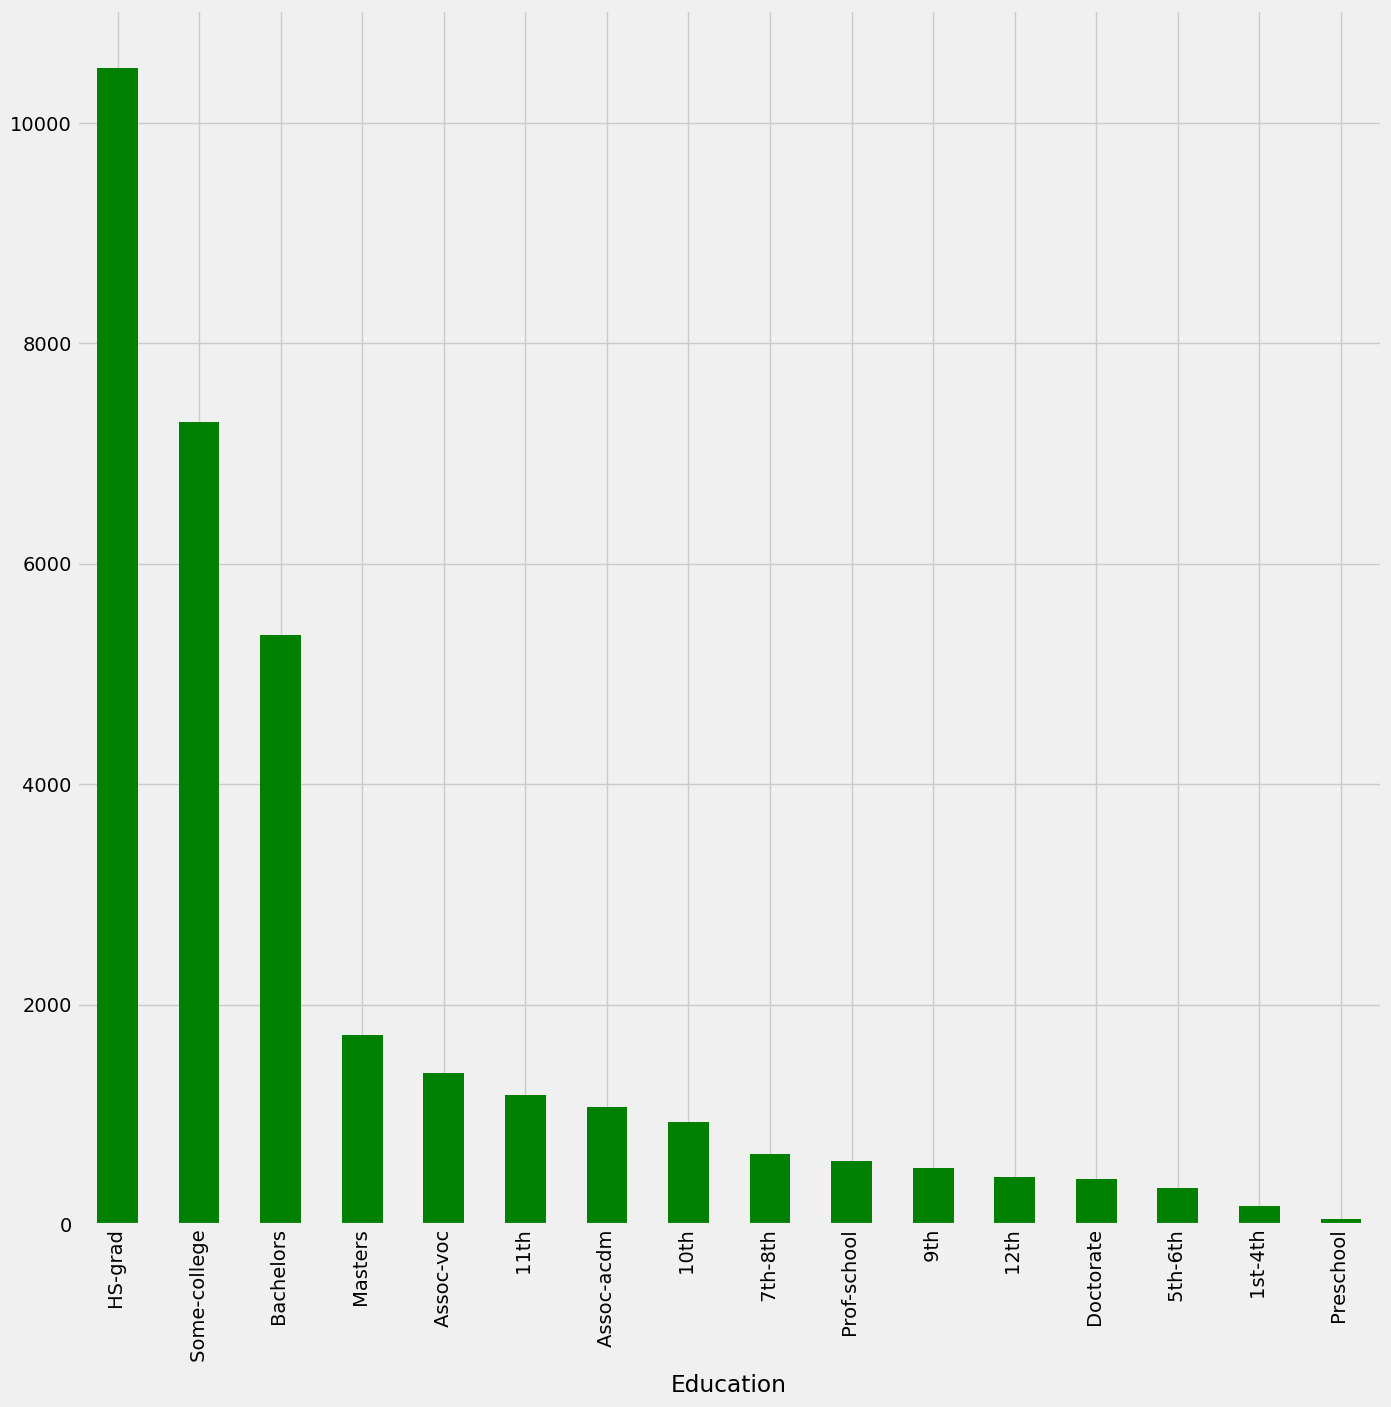

In [25]:
plt.figure(figsize=(15,15))
data['education'].value_counts().plot(kind='bar', color = "green")
plt.xlabel("Education")
plt.show()

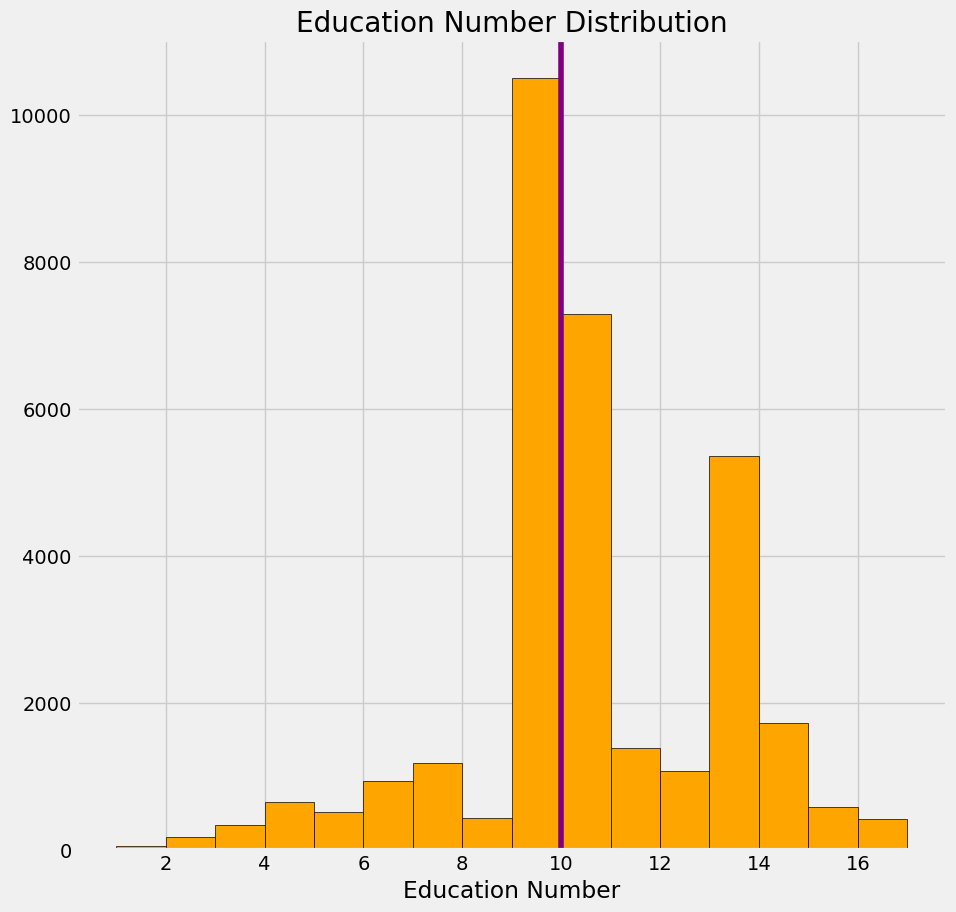

In [26]:
plt.figure(figsize=(10,10))
bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
plt.hist(data["education-num"], edgecolor="black", bins = bins, color = "orange")
plt.axvline(data["education-num"].median(), color="purple")
plt.title("Education Number Distribution")
plt.xlabel("Education Number")
plt.show()

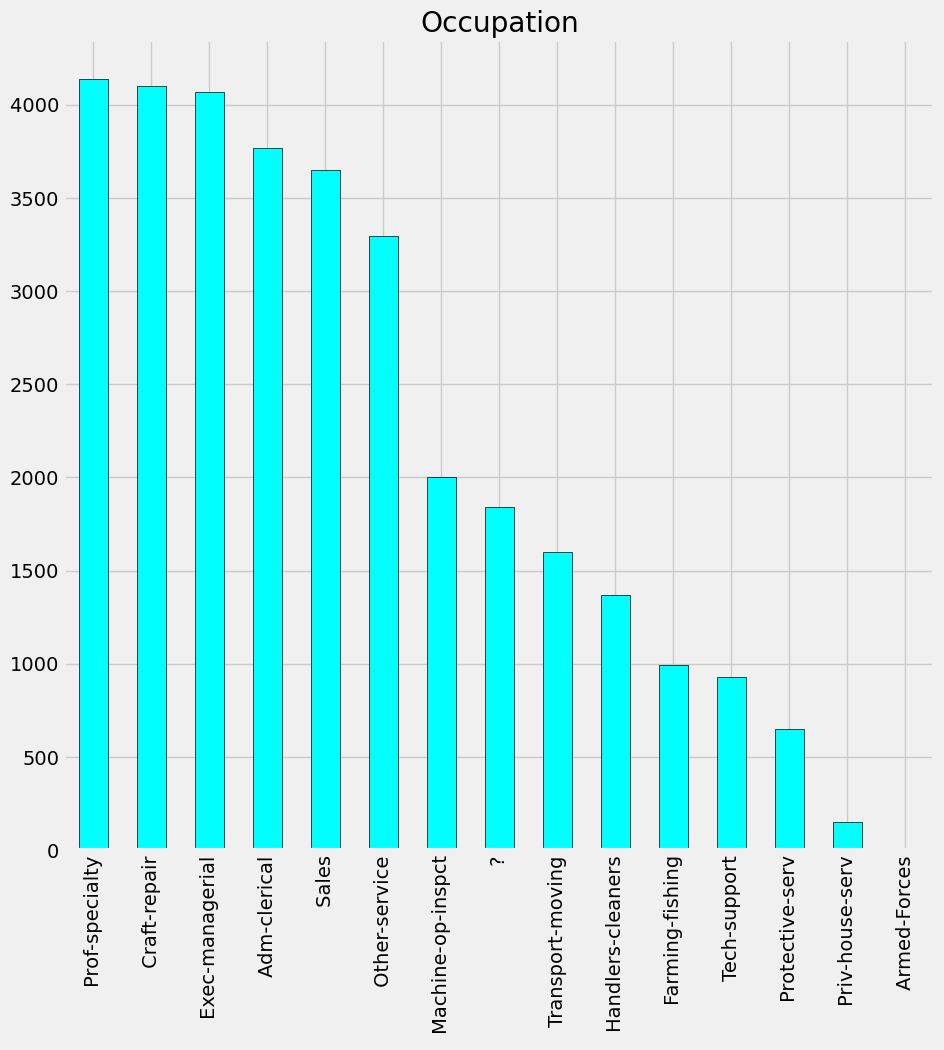

In [27]:
plt.figure(figsize=(10,10))
data['occupation'].value_counts().plot(kind="bar", color = "cyan", edgecolor="black")
plt.title("Occupation")
plt.show()

In [15]:
#data

In [28]:
data["marital-status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [29]:
df = data[["age","fnlwgt","education-num","marital-status","sex","capital-gain","capital-loss","hours-per-week","salary"]]

In [30]:
df.head(2)

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,77516,13,Never-married,Male,2174,0,40,<=50K
1,50,83311,13,Married-civ-spouse,Male,0,0,13,<=50K


In [31]:
data_new = pd.concat([df,f],axis = 1)
data_new

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,salary,"( ?,)","( Federal-gov,)","( Local-gov,)","( Never-worked,)","( Private,)","( Self-emp-inc,)","( Self-emp-not-inc,)","( State-gov,)","( Without-pay,)"
0,39,77516,13,Never-married,Male,2174,0,40,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,83311,13,Married-civ-spouse,Male,0,0,13,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,Divorced,Male,0,0,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,234721,7,Married-civ-spouse,Male,0,0,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28,338409,13,Married-civ-spouse,Female,0,0,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,Married-civ-spouse,Female,0,0,38,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32557,40,154374,9,Married-civ-spouse,Male,0,0,40,>50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32558,58,151910,9,Widowed,Female,0,0,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32559,22,201490,9,Never-married,Male,0,0,20,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
data_new["sex"].replace(["Male", "Female"], [0,1], inplace = True, regex=True)
data_new["marital-status"].replace(["Never-married","Divorced","Separated","Widowed"],0, inplace = True, regex=True)
data_new["marital-status"].replace(["Married-civ-spouse","Married-spouse-absent","Married-AF-spouse"],1, inplace = True, regex=True)

In [33]:
data_new

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,salary,"( ?,)","( Federal-gov,)","( Local-gov,)","( Never-worked,)","( Private,)","( Self-emp-inc,)","( Self-emp-not-inc,)","( State-gov,)","( Without-pay,)"
0,39,77516,13,0,0,2174,0,40,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,83311,13,1,0,0,0,13,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,0,0,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,234721,7,1,0,0,0,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28,338409,13,1,1,0,0,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,1,1,0,0,38,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32557,40,154374,9,1,0,0,0,40,>50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32558,58,151910,9,0,1,0,0,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32559,22,201490,9,0,0,0,0,20,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
# data

In [35]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   32561 non-null  int64  
 1   fnlwgt                32561 non-null  int64  
 2   education-num         32561 non-null  int64  
 3   marital-status        32561 non-null  int64  
 4   sex                   32561 non-null  int64  
 5   capital-gain          32561 non-null  int64  
 6   capital-loss          32561 non-null  int64  
 7   hours-per-week        32561 non-null  int64  
 8   salary                32561 non-null  object 
 9   ( ?,)                 32561 non-null  float64
 10  ( Federal-gov,)       32561 non-null  float64
 11  ( Local-gov,)         32561 non-null  float64
 12  ( Never-worked,)      32561 non-null  float64
 13  ( Private,)           32561 non-null  float64
 14  ( Self-emp-inc,)      32561 non-null  float64
 15  ( Self-emp-not-inc,

In [36]:
y = data_new["salary"].replace([' <=50K',' >50K'],[0,1])
df_x = data_new.drop("salary", axis = 1)
x_train , x_test , y_train , y_test = train_test_split(df_x,y,test_size = 0.2 , random_state = 42)

In [37]:
# y

In [38]:
model = KNeighborsClassifier(n_neighbors = 27)
model.fit(x_train,y_train)

C:\Users\Abdoulaye MAIGA\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsClassifier(n_neighbors=27)

In [39]:
model.score(x_test,y_test)

C:\Users\Abdoulaye MAIGA\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Abdoulaye MAIGA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8011668969752802

In [40]:
y_pred = model.predict(x_test)

cm =  confusion_matrix(y_test, y_pred)
#y_pred

C:\Users\Abdoulaye MAIGA\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Abdoulaye MAIGA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


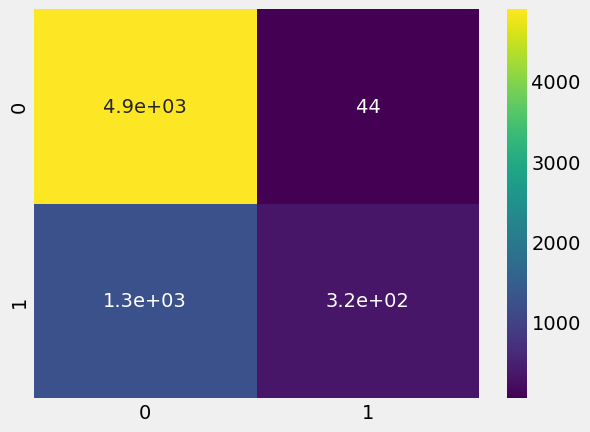

In [41]:
sns.heatmap(cm, annot = True ,cmap = 'viridis')
plt.show()